<img src="src/img/upc-positiu.png" width="350" height="105" align="left">

<center> <h1> What's Most Important During The First Date? </h1> </center>
<center> <h3> An Analysis of Student Speed-Dating </h3> </center>


<center> <h5> Andrea Iglesias <br> MSc Student <br> andrea.iglesias@estudiantat.upc.edu </h5> </center>
<center> <h5> Emmanuel Werr <br> MSc Student <br> emmanuel.werr@estudiantat.upc.edu </h5> </center>

<center> <h4> Facultat d’Informàtica de Barcelona <br> Master of Data Science </h4> </center>



# Introduction

This report is about...

## Table of Contents
* [1. Exploration](#exploration)
    * [1.1 Raw Data Summary](#raw_data_summary)
        * [1.1.1 Descriptive Statistics](#descriptive_statistics)
        * [1.1.2 Visualization](#visualization)
* [2. Preprocessing](#preprocessing)
    * [2.1 Checking Data Consistency](#checking_data_consistency)
        * [](#)
    * [2.2 Investigating Outliers](#investigating_outliers)
        * [](#)
    * [2.3 Investigating Missing Values](#investigating_missing_values)
        * [2.3.1 Missingness Summary](#missingness_summary)
        * [2.3.1 Missingness Mechanism](#missingness_mechanism)
        * [2.3.2 Treatment of Missing Values](#treatment_of_missing_values)
        * [](#)
    * [2.4 Feature Normalization](#feature_normalization)
        * [](#)
* [3. Feature Selection](#feature_selection)
    * [3.1 Univariate Feature Selection](#...)
        * [](#)
    * [3.2 Greedy Feature Selection](#...)
        * [](#)
* [4. Predictive Modelling](#predictive_modelling)
    * [4.1 Logistic Regression](#logistic_regression)
        * [](#)
    * [4.2 Naive Bayes](#naive_bayes)
        * [](#)
    * [4.3 Linear Discriminant Analysis](#linear_discriminant_analysis)
        * [](#)
    * [4.4 Support Vector Machines](#support_vector_machines)
        * [](#)
    * [4.5 K-Nearest Neighbors](#k_nearest_neighbors)
        * [](#)
    * [4.6 Decision Trees](#decision_trees)
        * [](#)
    * [4.7 Random Forests](#random_forests)
        * [](#)
    * [4.8 AdaBoost](#adaboost)
        * [](#)
    * [4.9 XGBoost](#xgboost)
        * [](#)
* [5. Ensemble Voting Classifier](#ensemble_voting_classifier)
    * [5.1 ](#)

# Getting Started

In [1]:
## ---*--- Importing Necessary Packages ---*---
## setting up notebook environment for analysis

# Custom Package Utilities
from src.feature_selection.univariate import UnivariateFeatureSelction
#from src.preprocessing import preprocess

# General Tools:
import os, sys  # standard python libraries
import pandas as pd
import numpy as np
import scipy
import itertools  # combinatorics toolkit
import time  # for obtaining computation execution times

# Data Pre-Processing:
from sklearn.preprocessing import StandardScaler  # for standardizing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model # BayesianRidge() model for iterative imputer
from collections import Counter  # object class for counting element occurences

# Machine Learning Classifiers:
from xgboost import XGBClassifier  # xgboost classifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron  # linear classifiers
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier  # decision tree classifiers
from sklearn.svm import SVC  # support-vector machine classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA classifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier  # Nearest-Neighbors classifier
        
# Feature and Model Selection:
from statsmodels.stats.outliers_influence import variance_inflation_factor # detect multicollinearity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold  # train/test splitting tool for cross-validation
from sklearn.model_selection import GridSearchCV  # hyperparameter optimization tool via exhaustive search
from sklearn.model_selection import cross_val_score  # automates cross-validated scoring
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc  # scoring metrics
from sklearn.feature_selection import RFE  # recursive feature elimination
from sklearn.model_selection import learning_curve  # learning-curve generation for bias-variance tradeoff
from sklearn.model_selection import validation_curve  # for fine-tuning hyperparameters
from sklearn.pipeline import Pipeline

# Plotting:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Manage Warnings: 
import warnings
warnings.filterwarnings('ignore')

# set_option to display all columns of DF during preview summaries
pd.set_option('display.max_columns', None)

# 1. Exploration
This is chapter number 1

## 1.1 Raw Data Summary <a class="anchor" id="7"></a> 

### 1.1.1 Descriptive Statistics <a class="anchor" id="descriptive_statistics"></a>

In [3]:
# 
raw_df = pd.read_csv('../data/raw/raw_data.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), int64(60), object(4)
memory usage: 7.9+ MB


From the output of the describe() method we can...

In [5]:
# 
raw_df.describe()

,has_null,wave,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
count,8378.00000,8378.000000,8283.000000,8274.000000,8378.000000,8378.000000,8378.000000,8299.000000,8299.000000,8378.000000,8378.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8220.000000,8378.000000,8277.000000,1800.000000,7205.000000,8378.000000,8378.000000,8378.000000,8138.000000,8069.000000,8378.000000,8378.000000,8003.000000,8378.000000,8378.000000,8378.000000
mean,0.87491,11.350919,26.358928,26.364999,4.185605,1.351755,0.395799,3.784793,3.651645,0.940797,0.897708,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,1.061590,0.812366,1.110766,0.777035,0.214013,0.313201,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,0.749224,1.017188,1.067439,0.790523,0.851397,0.501790,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,1.063858,0.812963,1.111482,0.777513,0.214013,0.313440,7.084733,8.294935,7.704460,8.403965,7.578388,0.981738,1.438171,1.233111,1.445691,1.178444,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,0.750179,1.018381,1.068632,0.791478,0.851993,0.502268,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.892934,0.477322,0.822153,1.251015,1.009429,0.913822,0.701958,0.312008,

### 1.1.2 Visualization <a class="anchor" id="visualization"></a>

In [6]:
personality_DF = raw_df[['like', 'attractive', 'attractive_o', 'funny', 'funny_o', 'intelligence', 'intelligence_o', 'shared_interests_o', 'match']].copy()
personality_DF.head()

,like,attractive,attractive_o,funny,funny_o,intelligence,intelligence_o,shared_interests_o,match
0,7.0,6.0,6.0,8.0,8.0,8.0,8.0,6.0,0
1,7.0,6.0,7.0,8.0,7.0,8.0,10.0,5.0,0
2,7.0,6.0,10.0,8.0,10.0,8.0,10.0,10.0,1
3,7.0,6.0,7.0,8.0,8.0,8.0,9.0,8.0,1
4,6.0,6.0,8.0,8.0,6.0,8.0,9.0,7.0,1


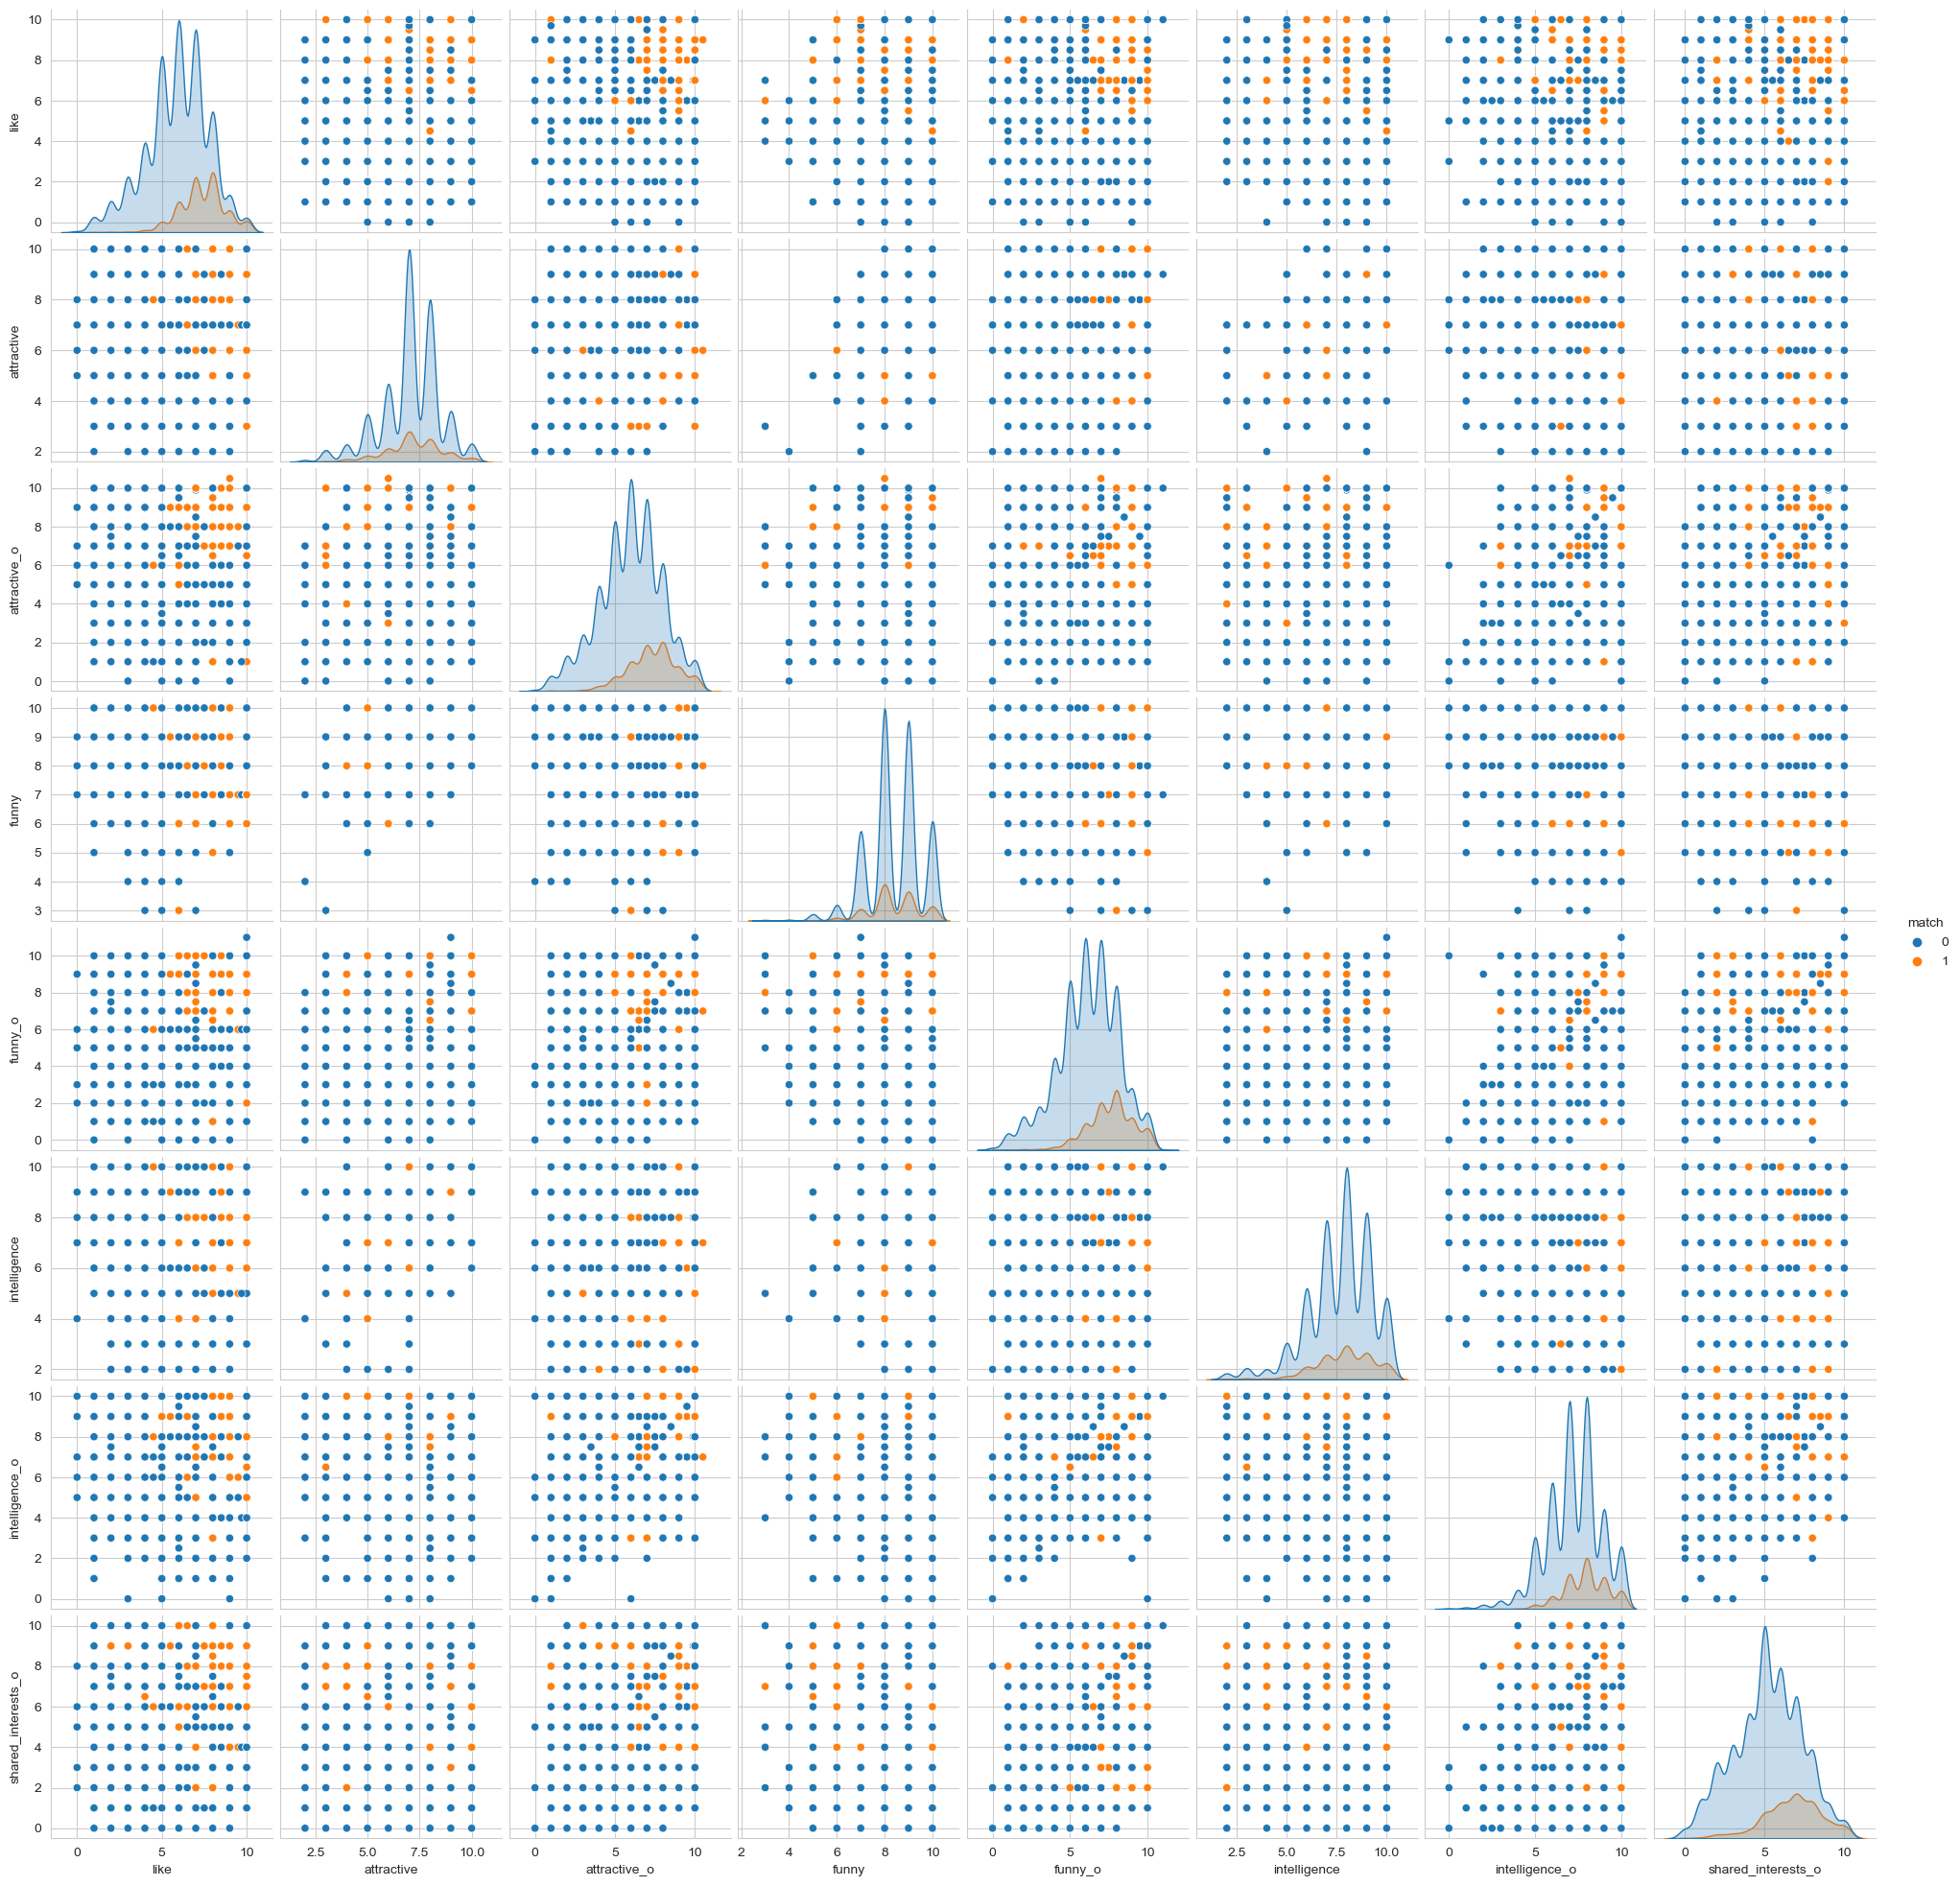

In [7]:
# 
#personality_DF = raw_df[['age', 'age_o', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'intelligence_o', 'ambitous_o', 'shared_interests_o', 'match']].copy()
#personality_DF = raw_df[['like', 'attractive', 'attractive_o', 'funny', 'funny_o', 'intelligence', 'intelligence_o', 'shared_interests_o', 'match']].copy()

sns.set_style('whitegrid');
sns.pairplot(personality_DF, hue='match');
plt.show()

---

# 2. Preprocessing

## 2.1 Checking Data Consistency <a class="anchor" id="investigating_outliers"></a>

<b>Creating an index for each person</b>

According to the dataset documentation, each observation is a date between two people. We think it might be interesting to add an identifier to each person to see how many dates that person has had. This identifier has been created by joining all the attributes that correspond to the person who has the date and leaving out the attributes of the partner.

In [115]:
#
df = pd.read_csv('../data/raw/raw_data.csv')

def index(df):
    return df['gender']+str(df['age'])+df['race']+df['field']+str(df['attractive_important'])+str(df['sincere_important'])+str(df['intellicence_important'])+str(df['funny_important'])+str(df['ambtition_important'])+str(df['attractive'])+str(df['sincere'])+str(df['intelligence'])+str(df['funny'])+str(df['ambition'])+str(df['sports'])+str(df['tvsports'])+str(df['exercise'])+str(df['dining'])+str(df['museums'])+str(df['art'])+str(df['hiking'])+str(df['gaming'])+str(df['clubbing'])+str(df['reading'])+str(df['tv'])+str(df['theater'])+str(df['movies'])+str(df['concerts'])+str(df['music'])+str(df['shopping'])+str(df['yoga'])


df['index_id'] = df.apply(lambda row : index(row), axis = 1)

dict_ids = {}

i=1
for id in df.index_id.unique():
        dict_ids[id] = i
        i=i+1

df['person_id'] = df['index_id'].map(dict_ids)
del df["index_id"]

<b>Reducing the variability of 'field' attribute</b>

In [116]:
## ---*--- Reducing variability of 'field' attribute ---*---
##

def fix_field(og_field):
    for key, value in field_dict.items():
        if og_field.lower() in value:
            return key

field_dict = {
    'law': ['law', 'law and social work', 'law and english literature [j.d./ph.d.]', 'intellectual property law', 'law/business'],
    'business': ['business', 'business [mba]', 'business- mba', 'international business', 'marketing', 'international relations', 'business; marketing', 'mba', 'public administration', 'master in public administration', 'masters in public administration', 'business/ finance/ real estate', 'business/law', 'business school', 'business administration', 'business consulting', 'business; media', 'fundraising management', 'business [finance & marketing]', 'mba - private equity / real estate', 'general management/finance'],
    'mathematics': ['mathematics', 'statistics', 'math', 'mathematics; phd', 'operations research', 'operations research [seas]', 'math education', 'ma in quantitative methods', 'stats', 'math of finance'],
    'finance': ['finance','finanace', 'mathematical finance', 'finance&economics', 'international finance; economic policy', 'financial math', 'international finance and business', 'finance/economics', 'mba finance', 'financial engineering'],
    'architecture': ['architecture', 'urban planning'],
    'engineering': ['electrical engineering', 'engineering', 'computer science', 'biomedical engineering', 'mechanical engineering', 'industrial engineering', 'electrical engg.', 'environmental engineering', 'industrial engineering/operations research', 'masters of industrial engineering'],
    'physics': ['marine geophysics', 'physics', 'physics [astrophysics]'],
    'biology': ['microbiology', 'biology', 'cell biology', 'ma biotechnology', 'neurobiology','neuroscience', 'conservation biology', 'biotechnology', 'genetics', 'molecular biology', 'genetics & development', 'biomedical informatics', 'neurosciences/stem cells', 'biology phd', 'biochemistry/genetics', 'biochemistry & molecular biophysics'],
    'chemistry': ['chemistry', 'biochemistry', 'computational biochemsistry'],
    'anthropology': ['museum anthropology', 'anthropology'], 
    'environmental science': ['climate-earth and environ. science', 'climate change', 'ecology', 'earth and environmental science', 'climate dynamics'],
    'political science': ['political science', 'business & international affairs', 'international affairs', 'international affairs/finance', 'international affairs - economic development', 'international affairs/international finance', 'international affairs and public health','business and international affairs [mba/mia dual degree]', 'international affairs/business', 'master of international affairs', 'international politics', 'mba / master of international affairs [sipa]', 'sipa / mia', 'international security policy - sipa', 'intrernational affairs', 'international affairs - economic policy', 'sipa - energy', 'public policy', 'human rights: middle east', 'human rights', 'sipa-international affairs', 'social work/sipa'],
    'sociology': ['social work', 'masters of social work', 'sociology', 'economics; sociology', 'qmss', 'international development', 'sociology and education', 'american studies', 'african-american studies/history'],
    'economics': ['applied maths/econs', 'economics', 'money', 'economics; english',  'economics and political science'],
    'psychology': ['psychology', 'psychology and english', 'clinical psychology', 'educational psychology', 'organizational psychology', 'school psychology', 'counseling psychology'],
    'medicine': ['medicine', 'medical informatics', 'biomedicine', 'epidemiology', 'gs postbacc premed', 'medicine and biochemistry'],
    'health': ['nutritiron', 'nutrition/genetics', 'sociomedical sciences- school of public health', 'tc [health ed]', 'health policy', 'nutrition', 'applied physiology & nutrition', 'public health'],
    'art': ['film', 'art history/medicine', 'art education', 'arts administration', 'art history', 'mfa -film', 'theatre management & producing', 'gsas', 'theater', 'mfa acting program', 'acting'],
    'education': ['elementary/childhood education [ma]', 'international educational development', 'education administration', 'masters of social work&education', 'speech language pathology', 'speech languahe pathology', 'elementary education', 'ma science education', 'social studies education', 'ma teaching social studies', 'education policy', 'education- literacy specialist', 'anthropology/education', 'bilingual education', 'education', 'tesol', 'cognitive studies in education', 'curriculum and teaching/giftedness', 'english education', 'early childhood education', 'ed.d. in higher education policy at tc', 'music education', 'communications in education', 'higher ed. - m.a.', 'neuroscience and education', 'elementary education - preservice', 'education leadership - public school administration', 'teaching of english'],
    'literature': ['german literature','classics', 'polish', 'english and comp lit','english', 'mfa creative writing', 'comparative literature', 'modern chinese literature', 'japanese literature', 'french', 'creative writing', 'creative writing - nonfiction', 'writing: literary nonfiction', 'creative writing [nonfiction]', 'nonfiction writing', 'mfa writing', 'mfa  poetry', 'soa -- writing'],
    'philosophy': ['philosophy [ph.d.]', 'philosophy and physics', 'philosophy'],
    'communications': ['speech pathology', 'instructional tech & media', 'instructional media and technology', 'journalism', 'communications'],
    'history': ['history', 'history [gsas - phd]', 'american studies [masters]'],
    'religion': ['religion', 'history of religion', 'religion; gsas'],
    'other/job': ['working', 'consulting', 'undergrad - gs', 'theory', '?']
}
            
df.field = df.field.apply(lambda x: fix_field(x))
df[df.field.isnull()].field # verify

Series([], Name: field, dtype: object)

In [117]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,person_id
0,0,1.0,female,21.0,27.0,6.0,2,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,1,1,law,35.0,20.0,20.0,20.0,0.0,5.0,2,1,1,1,0,0,6.0,8.0,8.0,8.0,8.0,6.0,1,1,1,1,1,1,15.0,20.0,20.0,15.0,15.0,15.0,0,1,1,0,0,0,6.0,8.0,8.0,8.0,7.0,1,1,1,1,1,6.0,9.0,7.0,7.0,6.0,5.0,1,2,1,1,1,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2,0,1,2,0,0,0,0,0,1,2,0,2,2,2,1,0,0.14,0,3.0,2.0,4.0,0,0,1,7.0,6.0,1,1,0.0,1,0,0,1
1,0,1.0,female,21.0,22.0,1.0,0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,1,1,law,60.0,0.0,0.0,40.0,0.0,0.0,2,0,0,2,0,0,7.0,8.0,10.0,7.0,7.0,5.0,1,1,2,1,1,0,15.0,20.0,20.0,15.0,15.0,15.0,0,1,1,0,0,0,6.0,8.0,8.0,8.0,7.0,1,1,1,1,1,7.0,8.0,7.0,8.0,5.0,6.0,1,1,1,1,0,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2,0,1,2,0,0,0,0,0,1,2,0,2,2,2,1,0,0.54,1,3.0,2.0,4.0,0,0,1,7.0,5.0,1,1,1.0,1,0,0,1
2,1,1.0,female,21.0,22.0,1.0,0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,1,1,law,19.0,18.0,19.0,18.0,14.0,12.0,1,1,1,1,0,0,10.0,10.0,10.0,10.0,10.0,10.0,2,2,2,2,2,2,15.0,20.0,20.0,15.0,15.0,15.0,0,1,1,0,0,0,6.0,8.0,8.0,8.0,7.0,1,1,1,1,1,5.0,8.0,9.0,8.0,5.0,7.0,0,1,2,1,0,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2,0,1,2,0,0,0,0,0,1,2,0,2,2,2,1,0,0.16,0,3.0,2.0,4.0,0,0,1,7.0,NaN,1,0,1.0,1,1,1,1
3,0,1.0,female,21.0,23.0,2.0,1,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,1,1,law,30.0,5.0,15.0,40.0,5.0,5.0,2,0,0,2,0,0,7.0,8.0,9.0,8.0,9.0,8.0,1,1,2,1,2,1,15.0,20.0,20.0,15.0,15.0,15.0,0,1,1,0,0,0,6.0,8.0,8.0,8.0,7.0,1,1,1,1,1,7.0,6.0,8.0,7.0,6.0,8.0,1,1,1,1,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2,0,1,2,0,0,0,0,0,1,2,0,2,2,2,1,0,0.61,1,3.0,2.0,4.0,0,0,1,7.0,6.0,1,1,0.0,1,1,1,1
4,0,1.0,female,21.0,24.0,3.0,1,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,1,1,law,30.0,10.0,20.0,10.0,10.0,20.0,2,0,1,0,0,1,8.0,7.0,9.0,6.0,9.0,7.0,1,1,2,1,2,1,15.0,20.0,20.0,15.0,15.0,15.0,0,1,1,0,0,0,6.0,8.0,8.0,8.0,7.0,1,1,1,1,1,5.0,6.0,7.0,7.0,6.0,6.0,0,1,1,1,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2,0,1,2,0,0,0,0,0,1,2,0,2,2,2,1,0,0.21,0,3.0,2.0,4.0,0,0,1,6.0,6.0,1,1,

## 2.2 Investigating Outliers <a class="anchor" id="investigating_outliers"></a>


<b>Outliers and wrong records as missing values</b>

For the variable `age` we can distinguish an extreme outlier that corresponds to a single person that is 55 years old. To treat this outlier we will declare her age as missing and then impute the value.

Moreover, we have observed that in variables `gaming`, `reading`, `attractive_o` and `funny_o` there are some observations above 10. We will consider these as incorrect because the values must be between 0 and 10. As we do not know if these people like too much these activities or there has been an error and for example instead of 13 the real value is 3, we will treat these values like missing and then impute them.

In [118]:
# 55 year old woman
df.loc[df['age'] == 55,['age']] = np.nan
df.loc[df['age_o'] == 55,['age_o']] = np.nan

# gaming and reading above 10
df.loc[df['gaming'] > 10,['gaming']] = np.nan
df.loc[df['reading'] > 10,['reading']] = np.nan

df.loc[df['attractive_o'] > 10,['attractive_o']] = np.nan
df.loc[df['funny_o'] > 10,['funny_o']] = np.nan

df.describe()

,has_null,wave,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,person_id
count,8378.00000,8378.000000,8277.000000,8268.000000,8378.000000,8378.000000,8378.000000,8299.000000,8299.000000,8378.000000,8378.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8165.000000,8091.000000,8072.000000,8017.000000,7656.000000,7302.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8221.000000,8299.000000,8248.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8220.000000,8378.000000,8277.000000,1800.000000,7205.000000,8378.000000,8378.000000,8378.000000,8138.000000,8069.000000,8378.000000,8378.000000,8003.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.87491,11.350919,26.338166,26.344219,4.185605,1.351755,0.395799,3.784793,3.651645,0.940797,0.897708,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,1.061590,0.812366,1.110766,0.777035,0.214013,0.313201,6.189884,7.175256,7.369301,6.400025,6.778409,5.474870,0.749224,1.017188,1.067439,0.790523,0.851397,0.501790,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,1.063858,0.812963,1.111482,0.777513,0.214013,0.313440,7.084733,8.294935,7.704460,8.403965,7.578388,0.981738,1.438171,1.233111,1.445691,1.178444,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,0.750179,1.018381,1.068632,0.791478,0.851993,0.502268,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.785184,5.745993,7.645611,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.892934,0.477322,0.822153,1.251015,1.009429,0.913

## 2.3 Investigating Missing Values <a class="anchor" id="investigating_missing_values"></a>

### 2.3.1 Missingness Summary

#### Key Findings:
- 1.78% missing values globally
- only 4 attributes have over 10% missing observations
    - expected_num_interested_in_me     
    - expected_num_matches 
    - shared_interests_o     
    - shared_interests_partner
- an extra 15 attributes have over 1% missing observations

In [119]:
## ---*--- Global ---*---
## 

global_missing = round( 100 * (df.isnull().sum().sum() / (8378 * 123)), 2) # total NA / size of df
print('{}% missing values globally'.format(global_missing))

if global_missing < 2:
    print('nice...\n')

## ---*--- By Attribute ---*---
## 

# filling dict as {'column_name': [total NA, percentage NA]}
missing_dict = {col: [df[col].isnull().sum(), round(df[col].isnull().sum() / len(df[col]), 4) * 100] for col in df}
# fancy method to sort dictionary descending by value
missing_dict = dict(sorted(missing_dict.items(), key=lambda x:x[1], reverse=True))

# output 'pretty format' partial results
print('{:<32} {:<10} {:<10}'.format('attribute', 'total NA', '% NA'))
print('{:<32} {:<10} {:<10}'.format('-'*31, '-'*9, '-'*6))
for key, value in missing_dict.items():
    if value[0] != 0:
        print('{:<32} {:<10} {} %'.format(key, value[0], round(value[1], 1)))

1.78% missing values globally
nice...

attribute                        total NA   % NA      
-------------------------------  ---------  ------    
expected_num_interested_in_me    6578       78.5 %
expected_num_matches             1173       14.0 %
shared_interests_o               1076       12.8 %
shared_interests_partner         1067       12.7 %
ambitous_o                       722        8.6 %
ambition_partner                 712        8.5 %
met                              375        4.5 %
funny_o                          361        4.3 %
funny_partner                    350        4.2 %
guess_prob_liked                 309        3.7 %
intelligence_o                   306        3.6 %
intelligence_partner             296        3.5 %
sinsere_o                        287        3.4 %
sincere_partner                  277        3.3 %
like                             240        2.9 %
attractive_o                     213        2.5 %
attractive_partner               202        2.4

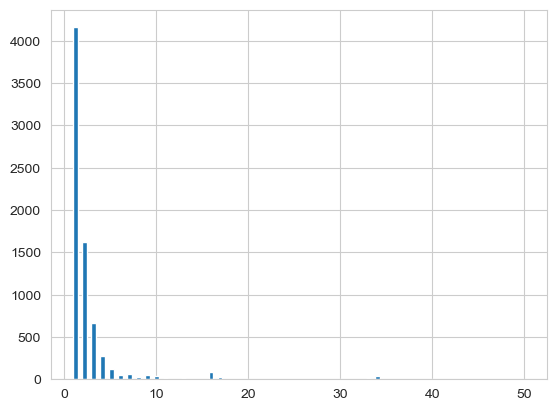

In [120]:
# ---*--- By Observation ---*---

# sum of global missing values 
df['has_null'].sum()
# new attribute with count of missing values in each row
df['nulls_byRow'] = df.isnull().sum(axis=1)

# plot histogram of df['null_byRow']
plt.hist(df.nulls_byRow[df['nulls_byRow'] != 0], bins = 100);
#df['nulls_byRow'].value_counts()

### 2.3.2 Missing Value Treatment

<b>Dropping fields and observations with majority missings</b>

In [121]:
# dropping 'expected_num_interested_in_me' attribute with ~80% missing values
df.drop('expected_num_interested_in_me', axis=1, inplace=True)
# dropping all observations with 10 or more missing values (approx. )
df = df[df['nulls_byRow'] < 10]

<b>Multiple Imputation by Chained Equations (MICE)</b>

In [122]:
# initializing OneHotEncoder
ohe = OneHotEncoder()

transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'race', 'race_o', 'field']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Columns: 158 entries, onehotencoder__x0_female to nulls_byRow
dtypes: float64(158)
memory usage: 9.8 MB


In [123]:
# initializing iterative imputer
imp = IterativeImputer(
    estimator=linear_model.BayesianRidge(),
    #estimator=XGBRegressor(
        #n_estimators=7,
        #random_state=42,
        #tree_method='auto'
    #),
    missing_values=np.nan,
    max_iter=10,
    initial_strategy='mean',
    imputation_order='ascending',
    n_nearest_features=None,
    verbose=2,
    random_state=42
)

oneHot_df = pd.DataFrame(imp.fit_transform(transformed_df), columns=transformed_df.columns)
oneHot_df.shape

[IterativeImputer] Completing matrix with shape (8102, 158)
[IterativeImputer] Ending imputation round 1/10, elapsed time 21.49
[IterativeImputer] Change: 46.92482245853748, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 2/10, elapsed time 41.76
[IterativeImputer] Change: 15.093822048017177, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 3/10, elapsed time 62.31
[IterativeImputer] Change: 8.423490187106749, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 4/10, elapsed time 83.02
[IterativeImputer] Change: 4.641330021743051, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 5/10, elapsed time 104.78
[IterativeImputer] Change: 3.145300859454626, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 6/10, elapsed time 125.27
[IterativeImputer] Change: 2.2544617757151277, scaled tolerance: 0.547 
[IterativeImputer] Ending imputation round 7/10, elapsed time 145.90
[IterativeImputer] Change: 1.7297

(8102, 158)

In [137]:
id_variables =['age','attractive_important','sincere_important','intellicence_important',
'funny_important','ambtition_important','attractive','sincere','intelligence','funny','ambition','sports','tvsports',
'exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music',
'shopping','yoga']

oneHot_processed_df = pd.DataFrame()

# assign to each 'person_id' the mean of imputed values for same category in different observations
for id in oneHot_df.person_id.unique():
    df_id = oneHot_df[oneHot_df['person_id']==id]
    for variable in id_variables:
        df_id[variable] = round(df_id[variable].mean(),0);
    oneHot_processed_df = pd.concat([oneHot_processed_df, df_id])

oneHot_processed_df = oneHot_processed_df.round(2)
oneHot_processed_df.describe()

,onehotencoder__x0_female,onehotencoder__x0_male,onehotencoder__x1_Asian/Pacific Islander/Asian-American,onehotencoder__x1_Black/African American,onehotencoder__x1_European/Caucasian-American,onehotencoder__x1_Latino/Hispanic American,onehotencoder__x1_Other,onehotencoder__x2_?,onehotencoder__x2_Asian/Pacific Islander/Asian-American,onehotencoder__x2_Black/African American,onehotencoder__x2_European/Caucasian-American,onehotencoder__x2_Latino/Hispanic American,onehotencoder__x2_Other,onehotencoder__x3_anthropology,onehotencoder__x3_architecture,onehotencoder__x3_art,onehotencoder__x3_biology,onehotencoder__x3_business,onehotencoder__x3_chemistry,onehotencoder__x3_communications,onehotencoder__x3_economics,onehotencoder__x3_education,onehotencoder__x3_engineering,onehotencoder__x3_environmental science,onehotencoder__x3_finance,onehotencoder__x3_health,onehotencoder__x3_history,onehotencoder__x3_law,onehotencoder__x3_literature,onehotencoder__x3_mathematics,onehotencoder__x3_medicine,onehotencoder__x3_other/job,onehotencoder__x3_philosophy,onehotencoder__x3_physics,onehotencoder__x3_political science,onehotencoder__x3_psychology,onehotencoder__x3_religion,onehotencoder__x3_sociology,has_null,wave,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,person_id,nulls_byRow
count,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000

<b>Recovering pre-oneHot DataFrame<b/>

In [ ]:
# 

ohe.fit(df[['gender', 'race', 'race_o', 'field']])
encoded_cols = []
i = 0
for col in ohe.categories_:
    for cat in col:
        encoded_cols.append(f'onehotencoder__x{i}_{cat}')
    i += 1

# 
recovered_df = pd.DataFrame(ohe.inverse_transform(oneHot_processed_df[encoded_cols]), columns=['gender', 'race', 'race_o', 'field'])

processed_df = oneHot_processed_df.drop(columns=encoded_cols, axis=1)
recovered_df = pd.concat([recovered_df, processed_df], axis=1)

# export to ../data/processed
recovered_df.to_csv('../data/processed/processed_data.csv', index=False)

In [135]:
# better column names after onehotencoding
new_cols = []
for col in oneHot_processed_df.columns:
    if col[15:17] == 'x0':
        new_cols.append(f'gender_{col[18:]}')
    elif col[15:17] == 'x1':
        new_cols.append(f'race_{col[18:]}')
    elif col[15:17] == 'x2':
        new_cols.append(f'race_o_{col[18:]}')
    elif col[15:17] == 'x3':
        new_cols.append(f'field_{col[18:]}')
    else:
        new_cols.append(col)

oneHot_processed_df.columns = new_cols

# export to ../data/processed
oneHot_processed_df.to_csv('../data/processed/processed_oneHot.csv', index=False)

---

# 3. Feature Selection

Below we explore several methods of feature selection, namely:
- Removing features with very low variance
    - `sklearn.feature_selection.VarianceThreshold`
- Removing features which have a high correlations with each other
    - Pearson correlation
- Univariate feature selection
    - ANOVA F-test & chi-squared
- Fitting models
    - Select features with best coefficients or importance
        - `sklearn.feature_selection.SelectFromModel`
    - Greedy feature selection
        - RFE
            - `sklearn.feature_selection.RFE`
    

In [65]:
# load processed data and display DF summary
df = pd.read_csv('../data/processed/processed_data.csv')

NUMERICAL = [col for col in df.columns if df[col].dtype == 'float']
CATEGORICAL = [col for col in df.columns if df[col].dtype == 'object']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Columns: 124 entries, gender to nulls_byRow
dtypes: float64(120), object(4)
memory usage: 7.7+ MB


In [49]:
df.head()

,gender,race,race_o,field,has_null,wave,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,person_id,nulls_byRow
0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,law,0.0,1.0,21.0,27.0,6.0,2.0,0.0,2.0,4.0,1.0,1.0,35.0,20.0,20.0,20.0,0.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,6.0,8.0,8.0,8.0,8.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1.0,1.0,1.0,1.0,1.0,6.0,9.0,7.0,7.0,6.0,5.0,1.0,2.0,1.0,1.0,1.0,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.14,0.0,3.0,4.0,0.0,0.0,1.0,7.0,6.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,law,0.0,1.0,21.0,22.0,1.0,0.0,0.0,2.0,4.0,1.0,1.0,60.0,0.0,0.0,40.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,1.0,1.0,2.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1.0,1.0,1.0,1.0,1.0,7.0,8.0,7.0,8.0,5.0,6.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.54,1.0,3.0,4.0,0.0,0.0,1.0,7.0,5.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,female,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,law,1.0,1.0,21.0,22.0,1.0,0.0,1.0,2.0,4.0,1.0,1.0,19.0,18.0,19.0,18.0,14.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1.0,1.0,1.0,1.0,1.0,5.0,8.0,9.0,8.0,5.0,7.0,0.0,1.0,2.0,1.0,0.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.16,0.0,3.0,4.0,0.0,0.0,1.0,7.0,3.523967,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,law,0.0,1.0,21.0,23.0,2.0,1.0,0.0,2.0,4.0,1.0,1.0,30.0,5.0,15.0,40.0,5.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,7.0,8.0,9.0,8.0,9.0,8.0,1.0,1.0,2.0,1.0,2.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,1.0,1.0,1.0,1.0,1.0,7.0,6.0,8.0,7.0,6.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.61,1.0,3.0,4.0,0.0,0.

### 3.1 Exploring Feature Correlations

---

# 4. Modelling <a class="anchor" id="modelling"></a>


In [86]:
# load processed data and display DF summary
df = pd.read_csv('../data/processed/processed_oneHot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Columns: 158 entries, gender_female to nulls_byRow
dtypes: float64(158)
memory usage: 9.8 MB


In [87]:
df.describe()

,gender_female,gender_male,race_Asian/Pacific Islander/Asian-American,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_?,race_o_Asian/Pacific Islander/Asian-American,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,field_anthropology,field_architecture,field_art,field_biology,field_business,field_chemistry,field_communications,field_economics,field_education,field_engineering,field_environmental science,field_finance,field_health,field_history,field_law,field_literature,field_mathematics,field_medicine,field_other/job,field_philosophy,field_physics,field_political science,field_psychology,field_religion,field_sociology,has_null,wave,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,person_id,nulls_byRow
count,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.000000,8102.

In [88]:
from sklearn.model_selection import train_test_split

# full feature set list
training_feature_list = [col_name for col_name in df.columns if col_name not in ['has_null', 'wave', 'nulls_byRow', 'person_id', 'decision', 'decision_o', 'match']]

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[training_feature_list]
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y, 
    test_size=0.25
)

In [112]:
def get_clf_name(classifier_object):
    """
    Returns  a string representing the name of the input classifier object. 
    
    """
    name_ = str(type(classifier_object)).split('.')[-1]
    for char in """ "'>() """:  # triple-quoted string definition allows us to include " and ' as characters
        name_ = name_.replace(char,"")  # delete unwanted characters from the name
    
    return name_


def train_classifier_ensemble_CV(classifiers, X_data, y_data, clf_params=None, cv_splits=10, 
                                 random_state=42, return_trained_classifiers=False, verbose=0):
    """
    Trains a list of classifiers on the input training data and returns cross-validated accuracy and f1 scores
    as well as feature_importances (where available). The list of trained classifier objects is also returned
    upon request. 
    
    : param classifiers : List of classifier objects; expects each has a scikit-learn wrapper. 
    
    : param X_data : Pandas dataframe containing our training features. 
    
    : param y_data : Pandas dataframe containing our training class labels.
    
    : param clf_params : (Optional) List of dictionaries containing parameters for each classifier object
                         in the list 'classifiers'. If not provided, the already-initialized parameters of
                         each classifier object will be used. 
                         
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param random_state : Seed for reproducibility between executions. 
    
    : param return_trained_classifiers : Boolean; if True, function will also return a list containing the
                                         fit classifier objects. 
                                         
    : param verbose : The amount of status text displayed during execution; 0 for less, 1 for more. 

    : return clf_comparison : A pandas dataframe tabulating the cross-validated performance of each classifier. 
    
    : return mean_feature_importances : An array containing the ranked feature importances for each classifier
                                        having the feature_importances_ attribute. 
                                        
    : return trained_classifiers : (if return_trained_classifiers=True) A list of trained classifier objects. 
    
    """
    # initialization
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=random_state, shuffle=True)
    
    train_accuracy_mean = []
    train_accuracy_std = []
    test_accuracy_mean = []
    test_accuracy_std = []
    f1_score_mean = []
    f1_score_std = []
    mean_feature_importances = []
    trained_classifiers = []
    classifier_name = []
    
    if clf_params is None:  # construct using classifier's existing parameter assignment
        clf_params = []
        for clf in classifiers:
            params = clf.get_params() 
            if 'random_state' in params.keys():  # assign random state / seed
                params['random_state'] = random_state
            elif 'seed' in params.keys():
                params['seed'] = random_state
            clf_params.append(params)
    
    # step through the classifiers for training and scoring with cross-validation
    for clf, params in zip(classifiers, clf_params):
        
        # automatically obtain the name of the classifier
        name = get_clf_name(clf)
        classifier_name.append(name)
        
        if verbose == 1:  # print status
            print('\nPerforming Cross-Validation on Classifier %s of %s:' 
                  % (len(classifier_name), len(classifiers)))
            print(name)
        
        # perform k-fold cross validation for this classifier and calculate scores for each split
        kth_train_accuracy = []
        kth_test_accuracy = []
        kth_test_f1_score = []
        kth_feature_importances = []
        
        for (train, test) in kfold.split(X_data, y_data):
        
            clf.set_params(**params)
            clf.fit(X_data.iloc[train], y_data.iloc[train])
            
            kth_train_accuracy.append(clf.score(X_data.iloc[train], y_data.iloc[train]))
            kth_test_accuracy.append(clf.score(X_data.iloc[test], y_data.iloc[test]))
            kth_test_f1_score.append(f1_score(y_true=y_data.iloc[test], y_pred=clf.predict(X_data.iloc[test])))
            
            if hasattr(clf, 'feature_importances_'):  # some classifiers (like linReg) lack this attribute
                kth_feature_importances.append(clf.feature_importances_)
        
        # populate scoring statistics for this classifier (over all cross-validation splits)
        train_accuracy_mean.append(np.mean(kth_train_accuracy))
        train_accuracy_std.append(np.std(kth_train_accuracy))
        test_accuracy_mean.append(np.mean(kth_test_accuracy))
        test_accuracy_std.append(np.std(kth_test_accuracy))
        f1_score_mean.append(np.mean(kth_test_f1_score))
        f1_score_std.append(np.std(kth_test_f1_score))
    
        # obtain array of mean feature importances, if this classifier had that attribute
        if len(kth_feature_importances) == 0:
            mean_feature_importances.append(False)
        else:
            mean_feature_importances.append(np.mean(kth_feature_importances, axis=0))
        
        # if requested, also export classifier after fitting on the complete training set 
        if return_trained_classifiers is not False:
            clf.fit(X_data, y_data)
            trained_classifiers.append(clf)
            
        # remove AdaBoost feature importances (we won't discuss their interpretation)
        if type(clf) == type(AdaBoostClassifier()):
            mean_feature_importances[-1] = False
        
    
    # construct dataframe for comparison of classifiers
    clf_comparison = pd.DataFrame({'Classifier Name' : classifier_name, 
                                   'Mean Train Accuracy' : train_accuracy_mean, 
                                   'Train Accuracy Standard Deviation' : train_accuracy_std,
                                   'Mean Test Accuracy' : test_accuracy_mean, 
                                   'Test Accuracy Standard Deviation' : test_accuracy_std, 
                                   'Mean Test F1-Score' : f1_score_mean,
                                   'F1-Score Standard Deviation' : f1_score_std})
    
    # enforce the desired column order
    clf_comparison = clf_comparison[['Classifier Name', 'Mean Train Accuracy',
                                     'Train Accuracy Standard Deviation', 'Mean Test Accuracy',
                                     'Test Accuracy Standard Deviation', 'Mean Test F1-Score',
                                     'F1-Score Standard Deviation']]
                   
    
    # add return_trained_classifiers to the function return, if requested, otherwise omit                                                
    if return_trained_classifiers is not False:
        return clf_comparison, mean_feature_importances, trained_classifiers
    else:
        return clf_comparison, mean_feature_importances

    
def plot_mean_feature_importances(clf_comparison, mean_feature_importances, X_data):
    """
    Generates bar plots of feature importances using the results of train_classifier_ensemble_CV.
    
    : param clf_comparison : A pandas dataframe comparing cross-validated classifier performances; 
                             one of the return parameters of the train_classifier_ensemble_CV function. 
    
    : param mean_feature_importances : An array of feature importances, generated by the 
                                       train_classifier_ensemble_CV function. 
    
    : param X_data : A pandas dataframe of the feature data used in the creation of clf_comparison and 
                     mean_feature_importances.
                     
    : return : None. 

    """
    for clf_name, importances in zip(clf_comparison['Classifier Name'], mean_feature_importances):

        if importances is not False:

            indices = np.argsort(importances)[::-1]
            feature_labels = X_data.columns

            plt.figure(figsize=(12,5))
            plt.title('Feature Importances for ' + clf_name)
            plt.bar(range(X_data.shape[1]), importances[indices], color='lightblue', align='center')
            plt.xticks(range(X_data.shape[1]), feature_labels[indices], rotation=90)
            plt.xlim([-1, X_data.shape[1]])
            plt.tight_layout()
            plt.show()
        
    return


def plot_top_feature_importances(clf_comparison, mean_feature_importances, X_data):
    '''  '''
    best_features = []
    for clf_name, importances in zip(clf_comparison['Classifier Name'], mean_feature_importances):

        if importances is not False:

            indices = np.argsort(importances)[::-1]
            feature_labels = X_data.columns

            for col in feature_labels[indices][:10]:
                best_features.append(col)

            plt.figure(figsize=(12,5))
            plt.title('Feature Importances for ' + clf_name)
            plt.bar(range(10), importances[indices][:10], color='lightblue', align='center')
            plt.xticks(range(10), feature_labels[indices][:10], rotation=90)
            plt.xlim([-1, 11])
            plt.tight_layout()
            plt.show()
        
    return set(best_features)

In [90]:
num_jobs = -1

classifier_list = [LogisticRegression(n_jobs=num_jobs), 
                   SGDClassifier(alpha=0.01, n_jobs=num_jobs), 
                   DecisionTreeClassifier(), 
                   ExtraTreeClassifier(max_depth=5, min_samples_split=10, splitter='random'), 
                   RandomForestClassifier(n_estimators=100, n_jobs=num_jobs), 
                   #LinearDiscriminantAnalysis(n_components=5, solver='svd'), 
                   SVC(shrinking=True, kernel='rbf'), 
                   XGBClassifier(booster='gbtree', n_jobs=num_jobs), 
                   GradientBoostingClassifier(n_estimators=100, loss='deviance'), 
                   AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50)]

In [91]:
clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                                                 X_data=X_train, 
                                                                                 y_data=y_train)

# display the comparison results
clf_comp_Full_FeatureSet

/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

,Classifier Name,Mean Train Accuracy,Train Accuracy Standard Deviation,Mean Test Accuracy,Test Accuracy Standard Deviation,Mean Test F1-Score,F1-Score Standard Deviation
0,LogisticRegression,0.863799,0.001925,0.853189,0.008420,0.427599,0.046338
1,SGDClassifier,0.834101,0.032928,0.823246,0.038967,0.395151,0.139672
2,DecisionTreeClassifier,1.000000,0.000000,0.793613,0.009009,0.395435,0.027060
3,ExtraTreeClassifier,0.835162,0.001769,0.831468,0.004879,0.079263,0.062005
4,RandomForestClassifier,0.999963,0.000073,0.854344,0.008085,0.337420,0.053464
5,SVC,0.831797,0.000068,0.831797,0.000615,0.000000,0.000000
6,XGBClassifier,1.000000,0.000000,0.858460,0.007170,0.488010,0.033361
7,GradientBoostingClassifier,0.890169,0.001688,0.859778,0.007644,0.449017,0.042052
8,AdaBoostClassifier,1.000000,0.000000,0.791968,0.010645,0.394861,0.025389


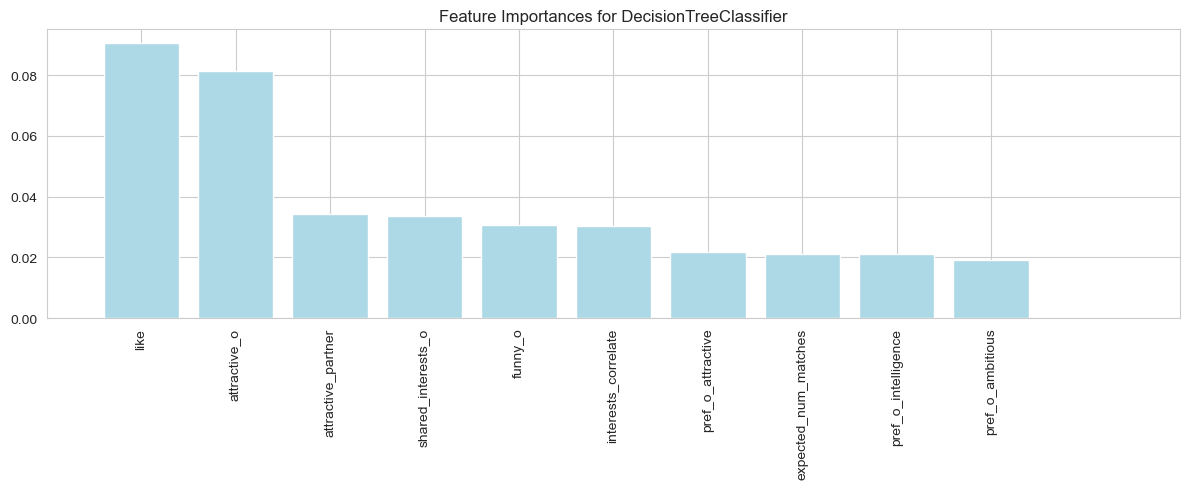

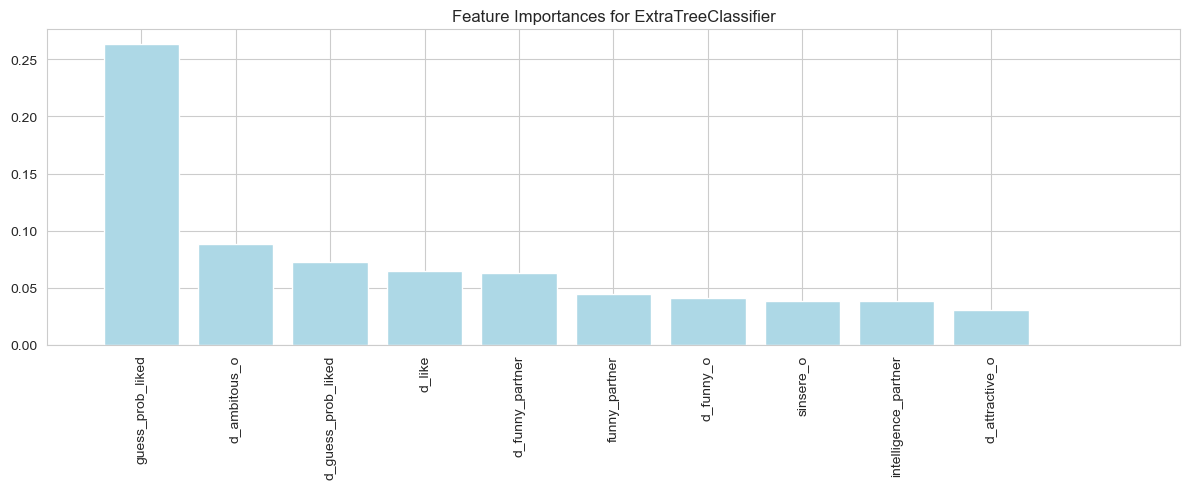

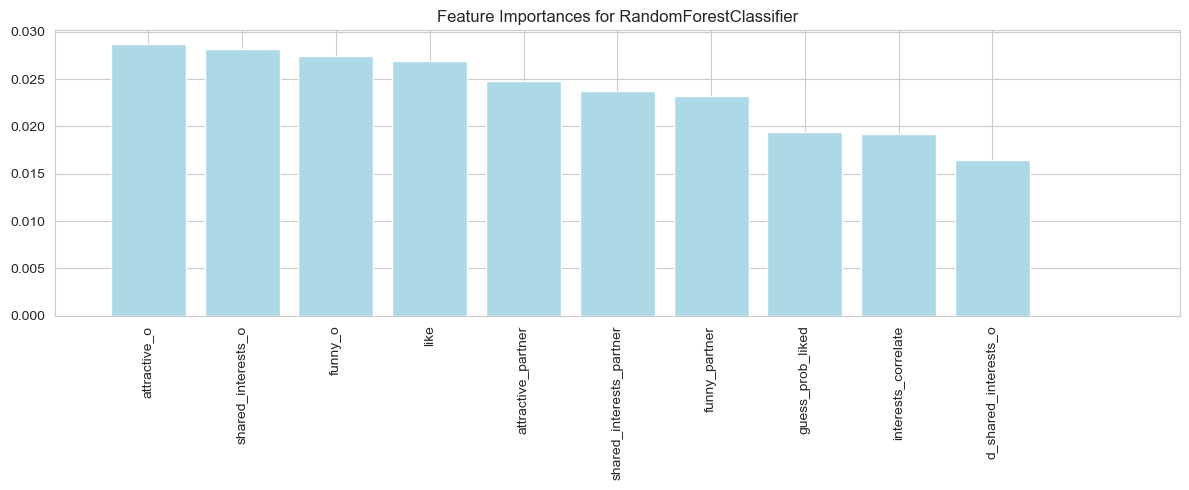

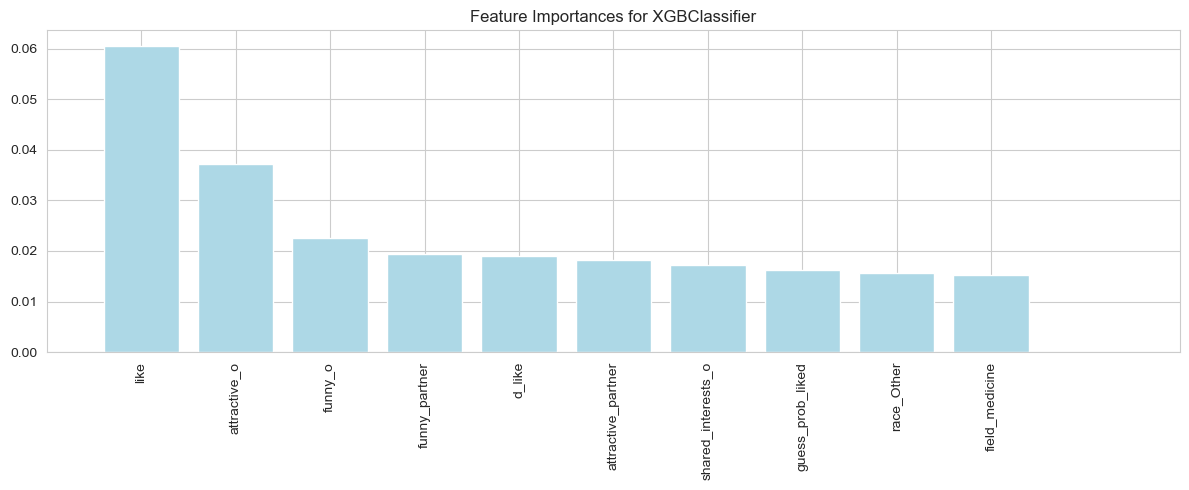

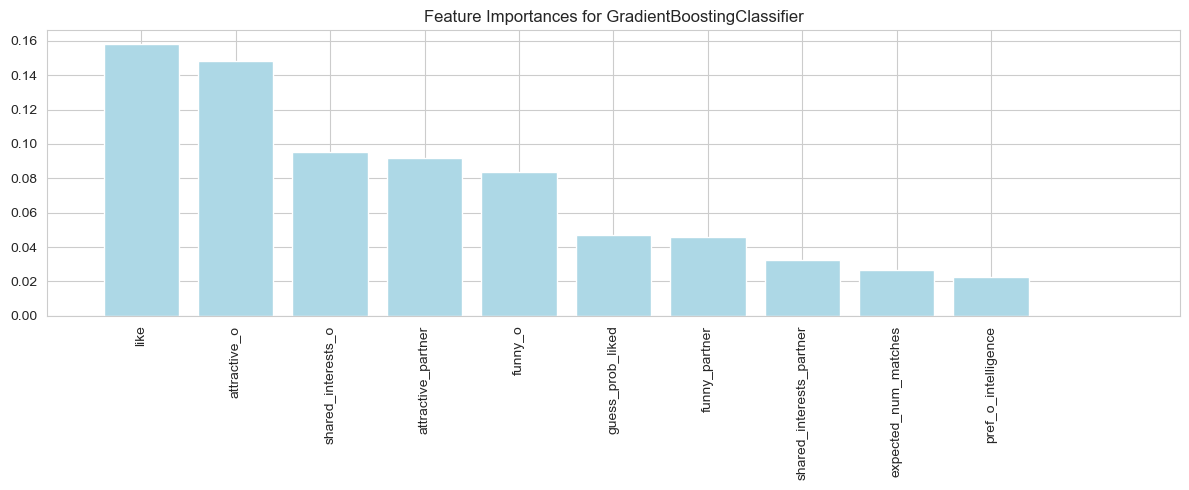

In [109]:
#     
best_features = plot_top_feature_importances(clf_comp_Full_FeatureSet, mean_feature_importances, X_data=X_train)

In [114]:
# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X = df[best_features]
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y, 
    test_size=0.25
)

clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(
    classifiers=classifier_list, 
    X_data=X_train, 
    y_data=y_train
)

# display the comparison results
clf_comp_Full_FeatureSet

/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/efwerr/miniforge3/envs/aml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

,Classifier Name,Mean Train Accuracy,Train Accuracy Standard Deviation,Mean Test Accuracy,Test Accuracy Standard Deviation,Mean Test F1-Score,F1-Score Standard Deviation
0,LogisticRegression,0.850432,0.002186,0.849081,0.009531,0.388814,0.031319
1,SGDClassifier,0.848018,0.004819,0.845292,0.007832,0.311942,0.108119
2,DecisionTreeClassifier,1.000000,0.000000,0.789173,0.015388,0.405968,0.028150
3,ExtraTreeClassifier,0.840008,0.003257,0.833281,0.007072,0.235303,0.076169
4,RandomForestClassifier,0.999927,0.000168,0.857637,0.008001,0.416180,0.032699
5,SVC,0.833608,0.000793,0.832949,0.002118,0.022544,0.028504
6,XGBClassifier,0.992191,0.001508,0.852702,0.009975,0.473545,0.053215
7,GradientBoostingClassifier,0.878118,0.001294,0.857146,0.005707,0.447138,0.026792
8,AdaBoostClassifier,1.000000,0.000000,0.791641,0.010911,0.411480,0.022787


In [70]:
clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                                                 X_data=X_train, 
                                                                                 y_data=y_train)

# display the comparison results
clf_comp_Full_FeatureSet

,Classifier Name,Mean Train Accuracy,Train Accuracy Standard Deviation,Mean Test Accuracy,Test Accuracy Standard Deviation,Mean Test F1-Score,F1-Score Standard Deviation
0,LogisticRegression,0.846536,0.001515,0.846279,0.009508,0.333872,0.046667
1,SGDClassifier,0.846811,0.001585,0.848088,0.011654,0.378574,0.072467
2,DecisionTreeClassifier,0.909078,0.001153,0.820445,0.012950,0.354620,0.049144
3,ExtraTreeClassifier,0.837576,0.003213,0.837721,0.012509,0.315782,0.143187
4,RandomForestClassifier,0.909078,0.001153,0.828014,0.013030,0.382199,0.049105
5,SVC,0.847743,0.000879,0.847100,0.006639,0.284851,0.041841
6,XGBClassifier,0.880166,0.002100,0.839698,0.010963,0.389374,0.054281
7,GradientBoostingClassifier,0.856576,0.001266,0.849079,0.011105,0.408341,0.043050
8,AdaBoostClassifier,0.909078,0.001153,0.825710,0.012422,0.395570,0.047560


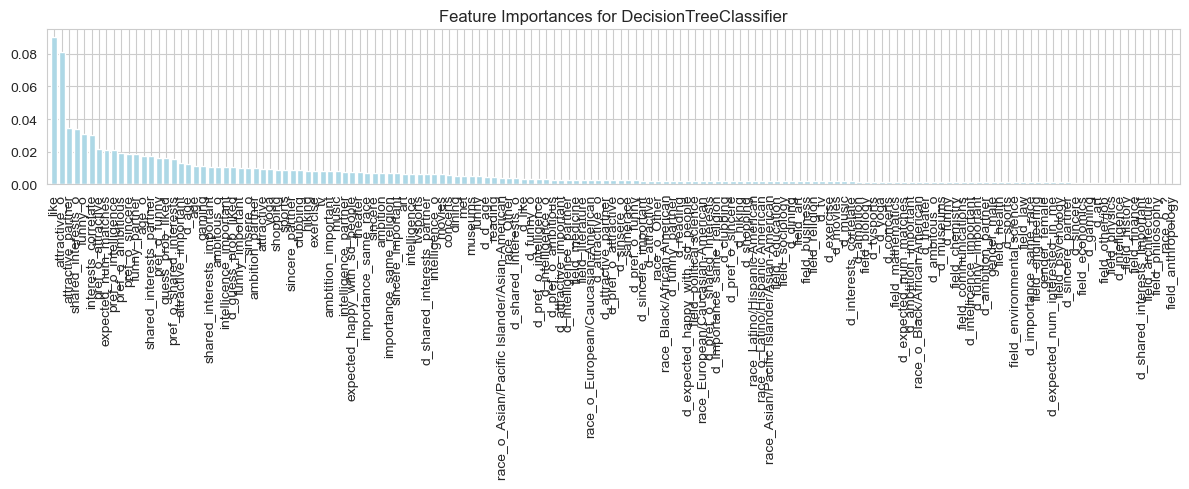

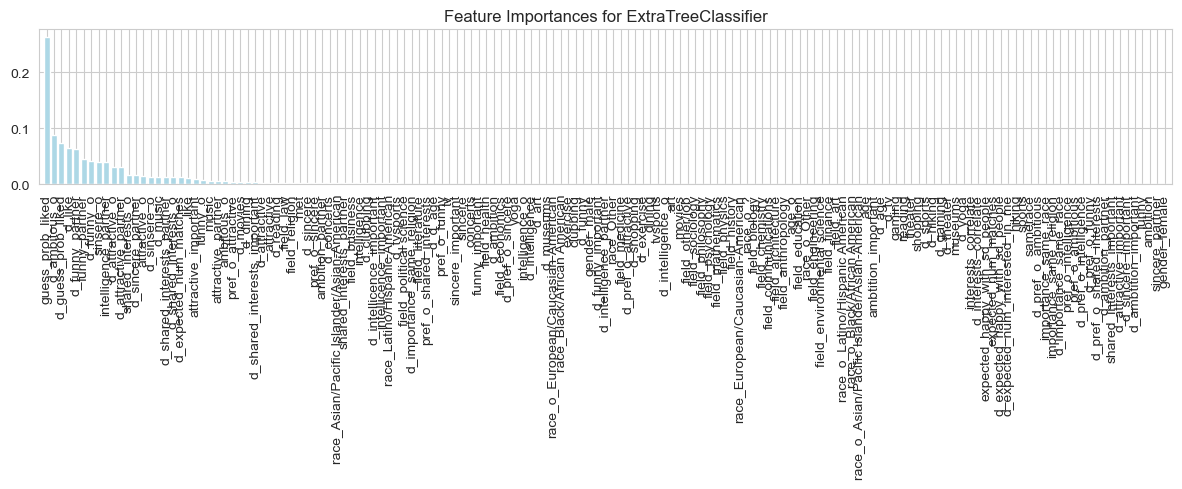

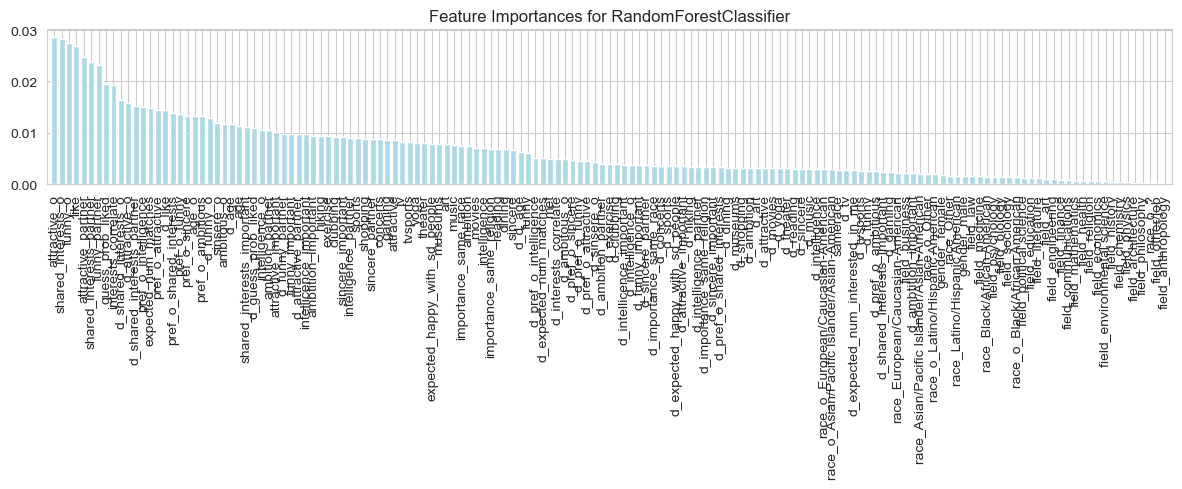

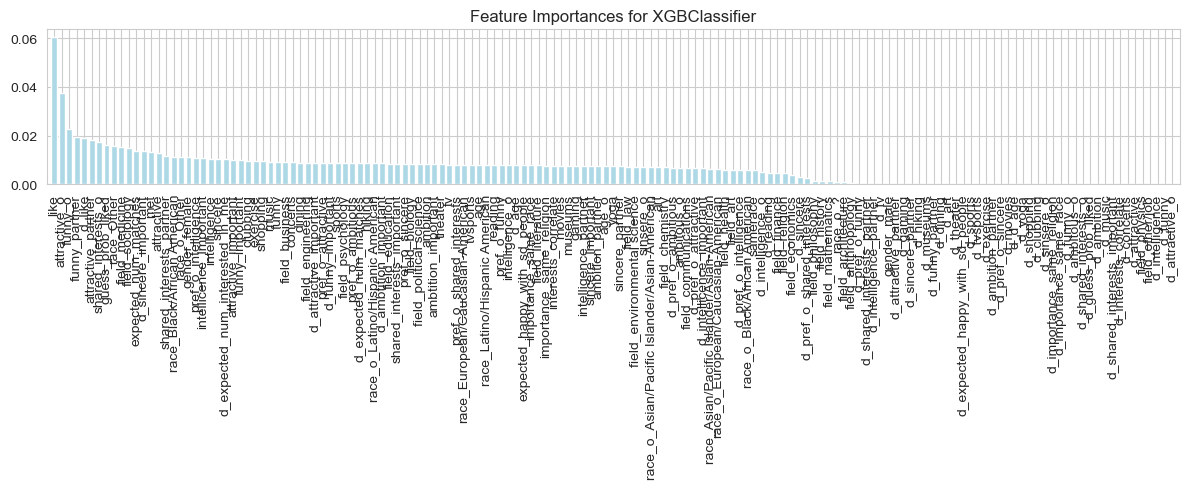

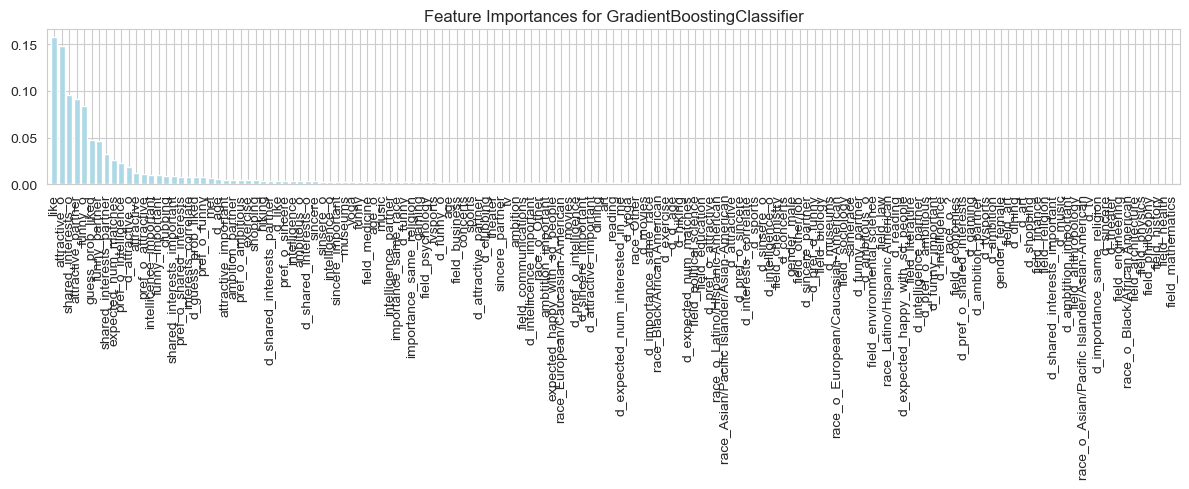

In [113]:
plot_mean_feature_importances(clf_comp_Full_FeatureSet, mean_feature_importances, X_data=X_train)

## 4.1 Logistic Regression
- Preprocessing
    - Remove outliers
    - Remove multicollinearity
    - Assert linear assumption
        - log transform
    - Assert normal distribution
        - BoxCox
    - Normalization & Standardization
    - Regularization
    - Beware of perfect predictor attributes
- Evaluation
    - ROC AUC
    - Hosmer-Lemeshow GOF test

In [71]:
# checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = df[NUMERICAL].columns
vif_data["VIF"] = [variance_inflation_factor(df[NUMERICAL].values, i) for i in range(len(df[NUMERICAL].columns))]

,feature,VIF
114,met,1.104698
6,samerace,1.831182
108,d_expected_num_interested_in_me,2.221694
21,d_pref_o_ambitious,2.687868
117,match,2.938539
...,...,...
83,music,177.217429
48,sincere,205.889591
50,funny,308.402131
118,person_id,1133.288790


In [74]:
vif_data.sort_values(by='VIF').tail(20)

,feature,VIF
35,attractive_important,98.475844
13,pref_o_intelligence,99.658842
11,pref_o_attractive,100.143687
24,sinsere_o,106.382742
58,sincere_partner,108.650577
74,art,118.071452
78,reading,124.348103
47,attractive,139.466741
25,intelligence_o,144.186283
59,intelligence_partner,145.552983


In [73]:
vif_data.sort_values(by='VIF').head(20)

,feature,VIF
114,met,1.104698
6,samerace,1.831182
108,d_expected_num_interested_in_me,2.221694
21,d_pref_o_ambitious,2.687868
117,match,2.938539
45,d_ambtition_important,3.009083
22,d_pref_o_shared_interests,3.368409
119,nulls_byRow,3.675773
116,decision_o,3.783822
46,d_shared_interests_important,3.824855


#### Preparing the data for Logistic Regression

The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

## 2.2 Naive Bayes
- Preprocessing
    - Same as for Logistic Regression...
    - retrain the model with new data
    - eliminate zero observations
    - remove correlated features
    - use the log probabilities in calculations
    - Handle continuous variables
        - discretize 
    
- Evaluation 

## 2.3 Linear Discriminant Analysis

This analysis is used when there are a lot of variables to consider (e.g., expression of thousands of proteins). LDA makes a lot of assumptions, such as: 

1. sample measurements are independent from each other
2. distributions are normal
3. co-variance of the measurements are identical across different classes

Therefore, LDA will not be accurate if the data do not follow these criteria. Unlike LDA, the support vector machine (SVM) model does not assume anything about data distribution.

## 2.4 Support Vector Machines
- preprocessing
    - scale all 
        - [0,1] vs. [-1,1]
- Explore The Parzen classifier
- KERNEL SELECTION!!!

## 2.5 K-Nearest Neighbors